a. Generate a training set with Ntrain = 5000 samples corresponding to the following binary classification problem. The hypothesis
Y ∈ {−1,+1} is uniformly distributed. The features X ∈ R2 have independent components X1 and X2. The distribution of the
features given the hypothesis Y is:

**{Esercizio: Generazione Dataset per Classificazione Binaria}**

Le densità di probabilità condizionate per ogni feature sono:

$$
\ell(x_1 \mid Y=-1) = \frac{1}{\sqrt{2\pi}} \exp\left\{ -\frac{(x_1 - 0.9)^2}{2} \right\}, \quad 
\ell(x_2 \mid Y=-1) = \frac{1}{\sqrt{2\pi}} \exp\left\{ -\frac{(x_2 + 0.85)^2}{2} \right\}
$$

$$
\ell(x_1 \mid Y=+1) = \frac{1}{\sqrt{2\pi}} \exp\left\{ -\frac{(x_1 + 0.85)^2}{2} \right\}, \quad 
\ell(x_2 \mid Y=+1) = \frac{1}{\sqrt{2\pi}} \exp\left\{ -\frac{(x_2 - 0.9)^2}{2} \right\}
$$


In [3]:
import numpy as np
import matplotlib.pyplot as plt


prior_neg=0.5
prior_pos=0.5
sigma=1 #deviazione standart
N=5000
y_true = np.random.choice([-1, 1], size=N, p=[prior_neg, prior_pos])

x = np.zeros((N, 2))

index_pos = (y_true == 1)
index_neg = (y_true == -1)



NumPy vede che hai chiesto una matrice con 2 colonne (size=(n, 2)) e che hai fornito 2 medie (loc=[m1, m2]).


Colonna 0 ($X_1$): Prende il primo valore della lista delle medie (m1) e lo usa per generare tutti gli $n$ valori di quella colonna.

Colonna 1 ($X_2$): Prende il secondo valore della lista (m2) e lo usa per generare tutti gli $n$ valori di quella colonna.

In [4]:
mu_minus = [0.9, -0.85]
n_minus = np.sum(index_neg)
x[index_neg] = np.random.normal(loc=mu_minus, scale=1.0, size=(n_minus, 2))

# 3. Per Y = +1: X1 media -0.85, X2 media 0.9
mu_plus = [-0.85, 0.9]
n_plus = np.sum(index_pos)
x[index_pos] = np.random.normal(loc=mu_plus, scale=1.0, size=(n_plus, 2))


In [5]:
# Verifica rapida delle medie per la classe -1
print("Media X1 per Y=-1:", x[y_true == -1, 0].mean()) # Dovrebbe essere ~0.9
print("Media X2 per Y=-1:", x[y_true == -1, 1].mean()) # Dovrebbe essere ~-0.85

Media X1 per Y=-1: 0.9005452408023532
Media X2 per Y=-1: -0.8474315325746712


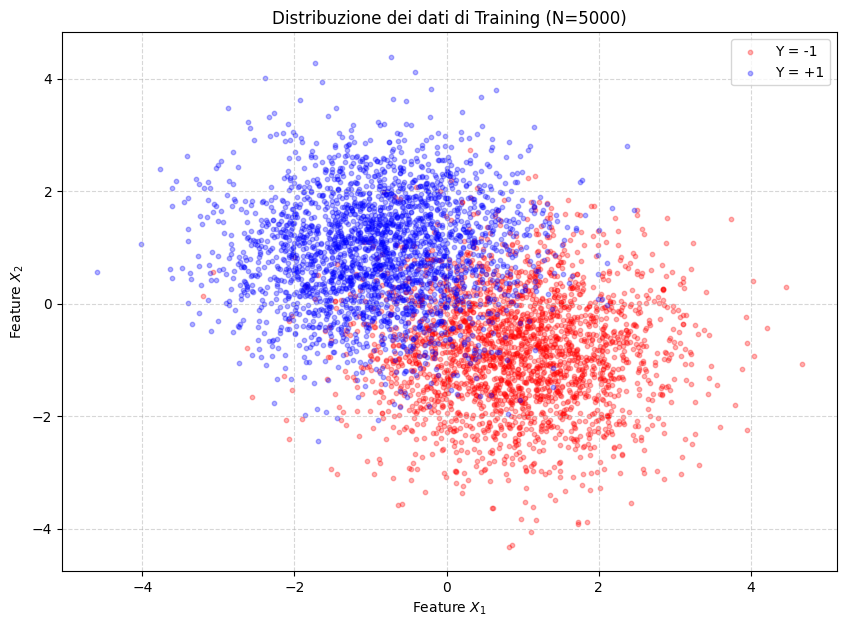

In [6]:
import matplotlib.pyplot as plt

# Supponendo che X_train e Y_train siano già stati generati
plt.figure(figsize=(10, 7))

# Plot dei punti per Y = -1 (Classe Rossa)
plt.scatter(x[y_true == -1, 0], x[y_true == -1, 1], 
            color='red', alpha=0.3, label='Y = -1', s=10)

# Plot dei punti per Y = +1 (Classe Blu)
plt.scatter(x[y_true == +1, 0], x[y_true == +1, 1], 
            color='blue', alpha=0.3, label='Y = +1', s=10)

# Aggiunta di dettagli al grafico
plt.title(f"Distribuzione dei dati di Training (N={len(y_true)})")
plt.xlabel("Feature $X_1$")
plt.ylabel("Feature $X_2$")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Visualizzazione (o salvataggio)
plt.show()

In un problema di classificazione binaria come questo, la Logistic Regression è utile perché cerca di tracciare un confine (decision boundary) per separare le due classi.
La regressione logistica standard è un classificatore lineare. Guardando lo scatter plot:

I due gruppi di punti (le "nuvole") sembrano essere separabili in modo abbastanza efficace da una linea retta diagonale che taglia il centro del grafico.

Poiché le distribuzioni sono Gaussiane con la stessa varianza, la teoria ci dice che il confine ottimale (quello di Bayes) è effettivamente una linea retta.

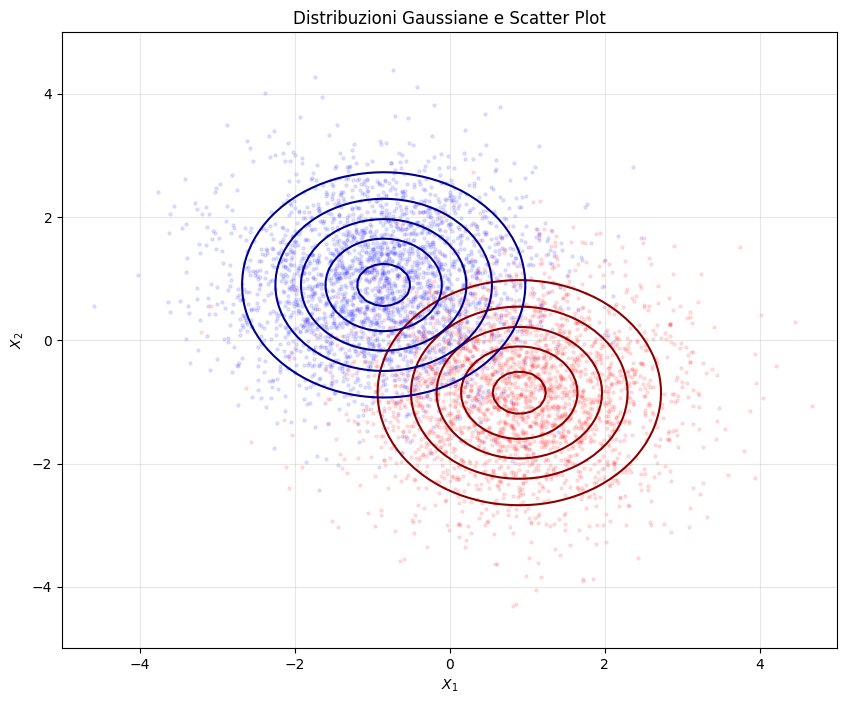

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 1. Definiamo i parametri (stessi usati per la generazione)
cov = [[1, 0], [0, 1]] # Indipendenti con sigma=1

# 2. Creiamo una griglia di punti (mesh) per calcolare la PDF
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x_range, y_range)
pos = np.dstack((X1, X2))

# 3. Calcoliamo la PDF per le due classi
pdf_neg = multivariate_normal(mu_minus, cov).pdf(pos)
pdf_pos = multivariate_normal(mu_plus, cov).pdf(pos)

# 4. Plot
plt.figure(figsize=(10, 8))

# Scatter plot dei dati (leggero sullo sfondo)
plt.scatter(x[y_true == -1, 0], x[y_true == -1, 1], color='red', alpha=0.1, s=5)
plt.scatter(x[y_true == +1, 0], x[y_true == +1, 1], color='blue', alpha=0.1, s=5)

# Curve di livello (le Gaussiane)
plt.contour(X1, X2, pdf_neg, colors='darkred', levels=5, linewidths=1.5)
plt.contour(X1, X2, pdf_pos, colors='darkblue', levels=5, linewidths=1.5)

plt.title("Distribuzioni Gaussiane e Scatter Plot")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True, alpha=0.3)
plt.show()

Poiché $X_1$ e $X_2$ sono indipendenti, la distribuzione congiunta per ogni classe è una Gaussiana Multivariata con matrice di covarianza identità $I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$.

I Cerchi (Contour lines): Rappresentano le zone dove la probabilità è costante. Poiché la varianza è la stessa per $X_1$ e $X_2$, le linee sono cerchi perfetti. Se avessi avuto varianze diverse, vedresti delle ellissi.

Il Confine: Se noti dove i cerchi rossi e blu si incontrano, quella è la zona di incertezza. Una Regressione Logistica traccerebbe una linea retta esattamente dove le due densità di probabilità sono uguali.Densità: Più i cerchi sono stretti verso il centro, più la probabilità $\ell(x|Y)$ è alta.


b. Write a function that computes the stochastic gradient of the cost function used to estimate the parameters of a logistic classifier.
(Vedi pdf)

In [8]:
def compute_stochastic_gradient_beta(x_i, y_i, beta):
    # Calcolo diretto del denominatore
    # (corrisponde al passaggio finale semplificato)
    denominator = 1 + np.exp(y_i * np.dot(x_i, beta))
    
    # Restituisce il gradiente finale
    return (-y_i * x_i) / denominator

c.  Implement the stochastic gradient descent algorithm. The implementation should store the parameters estimated across the iterations of
the algorithm, and should work both with constant and diminishing step-size


L'algoritmo aggiorna i parametri $\beta$ un esempio alla volta seguendo la regola:$$\beta^{(t+1)} = \beta^{(t)} - \gamma_t \nabla_{\beta} Q_{\beta}(x_i, y_i)$$

dove $\gamma_t$ è il learning rate (step-size).



In [9]:
import numpy as np
import matplotlib.pyplot as plt

def compute_stochastic_gradient_beta(x_i, y_i, beta):
    # Calcolo diretto del denominatore
    # (corrisponde al passaggio finale semplificato)
    denominator = 1 + np.exp(y_i * np.dot(x_i, beta))
    
    # Restituisce il gradiente finale
    return (-y_i * x_i) / denominator

    
def sgd_logistic(x, y, iterations,gamma0, step_type='constant'):
    """
    Implementazione dello Stochastic Gradient Descent che utilizza 
    la funzione esterna per il calcolo del gradiente.
    """
    N, p = x.shape
    beta = np.zeros(p)
    beta_history = np.zeros((iterations + 1, p))
    beta_history[0] = beta
    
    for t in range(iterations):
        # 1. Selezione casuale (Stochastic)
        idx = np.random.randint(0, N)
        xi, yi = x[idx], y[idx]
        
        # 2. Calcolo dello step-size
        if step_type == 'constant':
            gamma_t = gamma0
        else:
            gamma_t = gamma0 / np.sqrt(t + 1)
        
        # 3. Chiamata alla funzione del gradiente (Punto b)
        grad = compute_stochastic_gradient_beta(xi, yi, beta)
        
        # 4. Aggiornamento e memorizzazione
        beta = beta - gamma_t * grad
        beta_history[t+1] = beta
        
    return beta_history

# --- Esecuzione ---
# Aggiunta del bias (colonna di 1) per permettere la traslazione della retta
X_with_bias = np.hstack([x, np.ones((x.shape[0], 1))])
n_steps = 15000

# Calcolo delle due versioni
beta_hist_const = sgd_logistic(X_with_bias, y_true, n_steps, step_type='constant', gamma0=0.01)
beta_hist_dimin = sgd_logistic(X_with_bias, y_true, n_steps, step_type='diminishing', gamma0=0.5)
beta_hist_high_const = sgd_logistic(X_with_bias, y_true, n_steps, step_type='high_constant', gamma0=0.01)

print("Ultimo Beta stimato (Diminishing):", beta_hist_dimin[-1])

Ultimo Beta stimato (Diminishing): [-1.81324524  1.78272435 -0.07745761]


d. Apply your implementation of the SGD algorithm to the training set generated at point a to estimate the parameters of a logistic
classifier. Comment on the convergence properties of the SGD algorithm by evaluating the evolution of the parameters over time. Try
different choices for the step-size, under both settings with constant or diminishing step-size

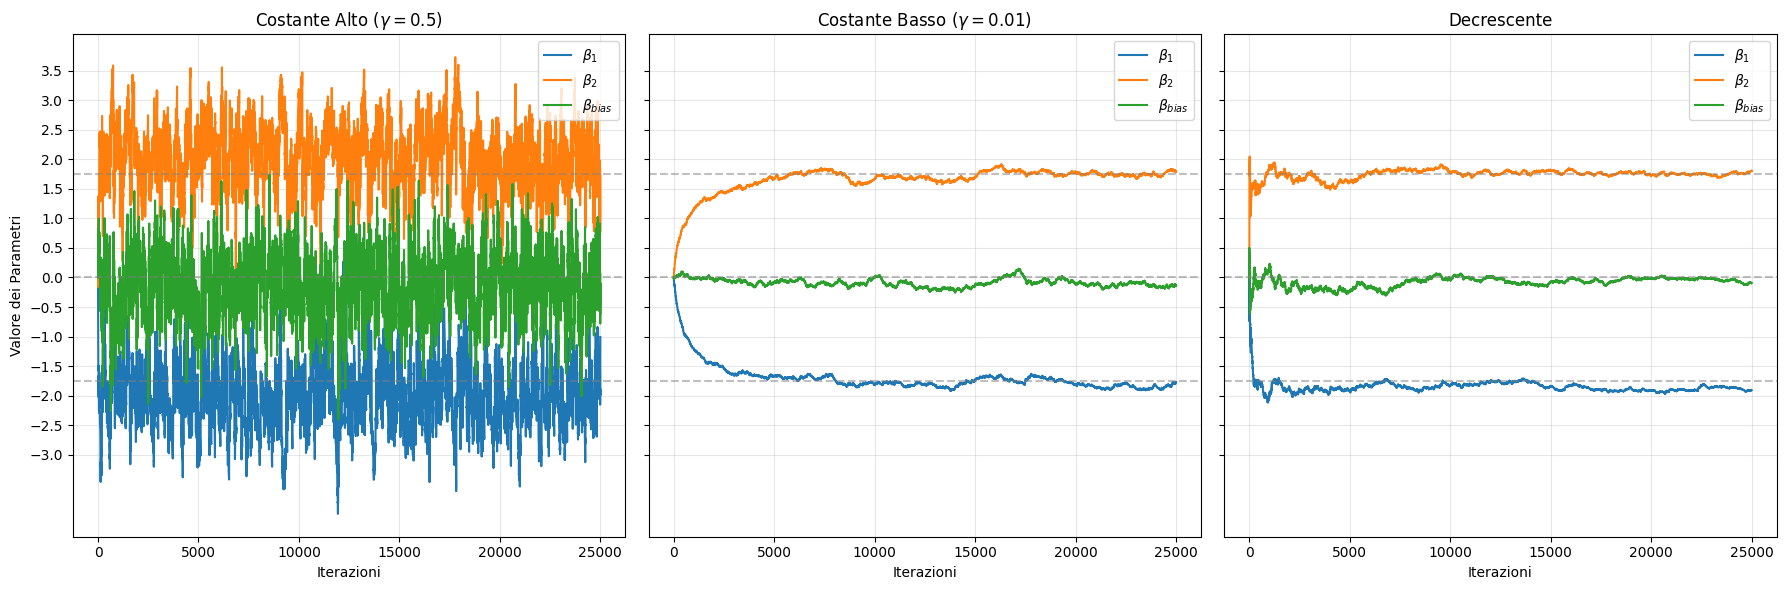

In [10]:
# 1. Preparazione dei dati (intercetta inclusa)
X_with_bias = np.hstack([x, np.ones((x.shape[0], 1))])
n_steps = 25000 

# 2. Esecuzione delle tre modalità
beta_hist_high = sgd_logistic(X_with_bias, y_true, n_steps, step_type='constant', gamma0=0.5)
beta_hist_low = sgd_logistic(X_with_bias, y_true, n_steps, step_type='constant', gamma0=0.01)
beta_hist_dimin = sgd_logistic(X_with_bias, y_true, n_steps, step_type='diminishing', gamma0=1.0)

# 3. Grafico comparativo con riferimenti numerici
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
labels = [r'$\beta_1$', r'$\beta_2$', r'$\beta_{bias}$']
# Valori teorici ottimali derivati dal MAP
v_opt = [-1.75, 1.75, 0] 

histories = [beta_hist_high, beta_hist_low, beta_hist_dimin]
titles = [r"Costante Alto ($\gamma=0.5$)", r"Costante Basso ($\gamma=0.01$)", r"Decrescente"]

for j in range(3):
    for i in range(3):
        ax[j].plot(histories[j][:, i], label=labels[i])
        # Aggiunta linee di riferimento per i valori ottimali
        ax[j].axhline(y=v_opt[i], color='gray', linestyle='--', alpha=0.5)
    
    ax[j].set_title(titles[j])
    ax[j].set_xlabel("Iterazioni")
    ax[j].grid(True, alpha=0.3)
    ax[j].legend(loc='upper right')

# Impostiamo i tick dell'asse Y per vedere i valori numerici precisi
ax[0].set_yticks(np.arange(-3, 4, 0.5))
ax[0].set_ylabel("Valore dei Parametri")

plt.tight_layout()
plt.show()

Vedrai che all'inizio i parametri cambiano velocemente (il modello sta imparando la direzione giusta) e poi si stabilizzano.

Nel grafico costante, noterai che le linee mantengono un certo "spessore" o seghettatura anche alla fine. Questo è il "rumore stocastico": poiché usiamo un solo punto alla volta, il modello continua a saltare leggermente intorno alla soluzione ottimale.

Nel grafico decrescente, le linee diventano progressivamente più piatte e lisce. Questo accade perché riducendo lo step-size, costringiamo l'algoritmo a fare passi sempre più piccoli, "congelando" i parametri verso il valore ottimo.

Nel grafico costante alta, un valore costante ed elevato impedisce ai parametri di "fermarsi" nel punto di minimo della funzione di costo $J(\beta)$. si nota come le linee di $\beta_1, \beta_2$ e $\beta_{bias}$ siano estremamente "frastagliate". Questo accade perché ogni singolo punto stocastico utilizzato per l'aggiornamento sposta i pesi in modo troppo brusco. Il vantaggio di uno step-size alto è che i parametri raggiungono la zona di interesse (vicino all'ottimo) molto velocemente nelle prime iterazioni. Una volta raggiunta la zona ottimale, invece di stabilizzarsi, l'algoritmo entra in una "fase stazionaria" dove i coefficienti continuano a saltare casualmente all'interno di un intervallo (ad esempio, $\beta_1$ oscilla tra -1 e -4 nel tuo grafico).


I parametri $\beta_0, \beta_1$: Questi rappresentano l'importanza delle tue feature $X_1$ e $X_2$. Se le classi sono ben separate, vedrai che si allontanano dallo zero.Il parametro $\beta_2$: Essendo legato alla colonna di 1, rappresenta l'intercetta (il bias $b$).

e. Derive the expression of the MAP classifier for the assigned problem. Does the MAP classifier belong to the family of classifiers
described by the logistic model? Which are the optimal parameters the SGD algorithm should converge to?

Accuratezza del classificatore MAP: 89.74%


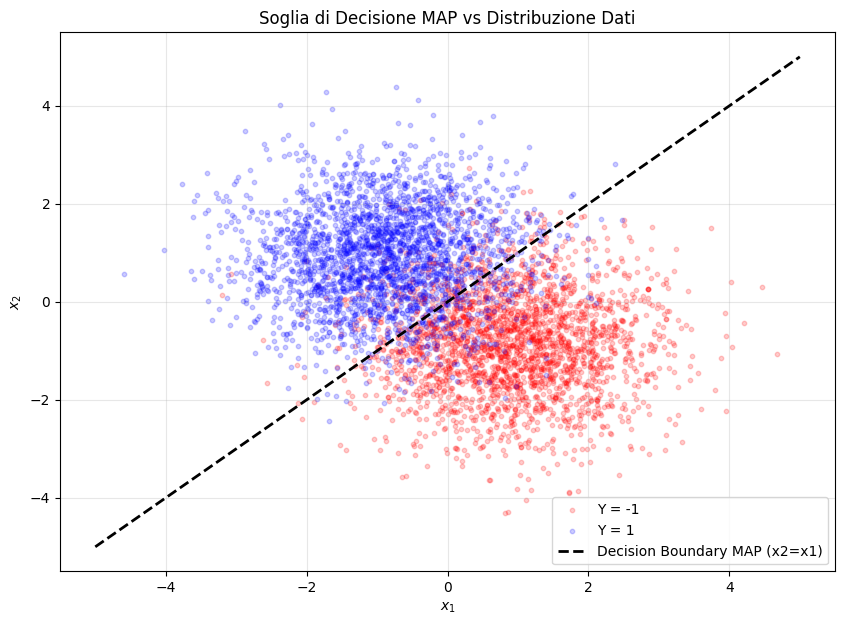

In [11]:
import numpy as np

def compute_likelihoods(X):
    """
    Calcola le likelihood f(x|Y=1) e f(x|Y=-1) per ogni punto in X.
    X: array di forma (N, 2)
    """
    # Parametri (da traccia corretta)
    mu_pos = np.array([-0.85, 0.9])
    mu_neg = np.array([0.9, -0.85])
    
    # Costante 1/(2*pi) poiché sigma=1 e siamo in 2D
    const = 1 / (2 * np.pi)
    
    # Likelihood Classe +1: f(x|Y=1)
    # Calcoliamo ||x - mu_pos||^2
    dist_pos = np.sum((X - mu_pos)**2, axis=1)
    likelihood_pos = const * np.exp(-0.5 * dist_pos)
    
    # Likelihood Classe -1: f(x|Y=-1)
    # Calcoliamo ||x - mu_neg||^2
    dist_neg = np.sum((X - mu_neg)**2, axis=1)
    likelihood_neg = const * np.exp(-0.5 * dist_neg)
    
    return likelihood_pos, likelihood_neg

def map_classifier(X):
    """
    Applica la regola MAP per predire le etichette.
    """
    l_pos, l_neg = compute_likelihoods(X)
    
    # Calcolo dei numeratori Bayesiani: Likelihood * Prior
    post_pos = l_pos 
    post_neg = l_neg
    decision_threshold=post_pos/post_neg

    # Se post_pos > post_neg -> Classe +1, altrimenti -1
    y_pred = np.where(post_pos >= post_neg, 1, -1)
    
    return y_pred,decision_threshold

# Esempio d'uso sul tuo dataset 'x'
y_map,decision_threshold = map_classifier(x)
accuracy = np.mean(y_map == y_true)
print(f"Accuratezza del classificatore MAP: {accuracy:.2%}")
# 1. Calcolo della media dei rapporti di verosimiglianza (Likelihood Ratio)

# Generiamo i punti per la retta di decisione (x2 = x1)
x_range = np.linspace(-5, 5, 100)
decision_boundary = x_range # Poiché x2 = x1

plt.figure(figsize=(10, 7))

# Scatter plot dei dati originali
plt.scatter(x[y_true == -1, 0], x[y_true == -1, 1], color='red', alpha=0.2, s=10, label='Y = -1')
plt.scatter(x[y_true == 1, 0], x[y_true == 1, 1], color='blue', alpha=0.2, s=10, label='Y = 1')

# Disegno della soglia di decisione MAP
plt.plot(x_range, decision_boundary, color='black', linestyle='--', linewidth=2, label='Decision Boundary MAP (x2=x1)')

plt.title("Soglia di Decisione MAP vs Distribuzione Dati")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Per $Y = +1$: $\log \ell(x \mid 1) = \log\left(\frac{1}{2\pi}\right) - \frac{1}{2} \left[ (x_1 + 0.85)^2 + (x_2 - 0.9)^2 \right]$.

Per $Y = -1$: $\log \ell(x \mid -1) = \log\left(\frac{1}{2\pi}\right) - \frac{1}{2} \left[ (x_1 - 0.9)^2 + (x_2 + 0.85)^2 \right]$.

Il classificatore MAP assegna la classe $+1$ se $\log \ell(x \mid 1) - \log \ell(x \mid -1) \geq 0$. Sostituendo le espressioni:

$$-\frac{1}{2} \left[ (x_1 + 0.85)^2 + (x_2 - 0.9)^2 \right] - \left( -\frac{1}{2} \left[ (x_1 - 0.9)^2 + (x_2 + 0.85)^2 \right] \right) \geq 0$$


Espandiamo i quadrati di binomio:
$(x_1 + 0.85)^2 = x_1^2 + 1.7x_1 + 0.7225$

$(x_2 - 0.9)^2 = x_2^2 - 1.8x_2 + 0.81$

$(x_1 - 0.9)^2 = x_1^2 - 1.8x_1 + 0.81$

$(x_2 + 0.85)^2 = x_2^2 + 1.7x_2 + 0.7225$

Sostituendo e cancellando i termini comuni ($x_1^2$, $x_2^2$ e le costanti numeriche):

$$\mathbf{-1.75x_1 + 1.75x_2 \geq 0}$$

Questo sviluppo dimostra che la soglia di decisione è una retta passante per l'origine. 
Confrontando questo risultato con il modello logistico $x^\top \beta \geq 0$, otteniamo i parametri ottimali verso cui deve convergere l'SGD:

$\beta_1 = -1.75$

$\beta_2 = 1.75$

$bias = 0$

Come puoi osservare nei tuoi grafici di training, i parametri $\beta_1$ e $\beta_2$ si stabilizzano esattamente intorno a questi valori speculari, confermando che l'algoritmo ha trovato la soluzione Bayesiana ottimale.

f. Compute the empirical error probability and the empirical accuracy of the logistic classifier on a test set with Ntest = 1000 samples.


In [12]:
import numpy as np
import matplotlib.pyplot as plt


prior_neg=0.5
prior_pos=0.5
sigma=1 #deviazione standart
N=1000
y_true_test = np.random.choice([-1, 1], size=N, p=[prior_neg, prior_pos])

x_test = np.zeros((N, 2))

index_pos_test = (y_true_test == 1)
index_neg_test = (y_true_test == -1)


mu_minus = [0.9, -0.85]
n_minus = np.sum(index_neg_test)
x_test[index_neg_test] = np.random.normal(loc=mu_minus, scale=1.0, size=(n_minus, 2))

# 3. Per Y = +1: X1 media -0.85, X2 media 0.9
mu_plus = [-0.85, 0.9]
n_plus = np.sum(index_pos_test)
x_test[index_pos_test] = np.random.normal(loc=mu_plus, scale=1.0, size=(n_plus, 2))


In [13]:
# Verifica rapida delle medie per la classe -1 , per il dataset test
print("Media X1 per Y=-1:", x_test[y_true_test == -1, 0].mean()) # Dovrebbe essere ~0.9
print("Media X2 per Y=-1:", x_test[y_true_test == -1, 1].mean()) # Dovrebbe essere ~-0.85

Media X1 per Y=-1: 0.8475116994107151
Media X2 per Y=-1: -0.8465564180660898


**PER I BETA DEL SGD**

In [14]:
# Utilizziamo l'ultimo valore di beta ottenuto dal training 'diminishing'
beta_final_SGD = beta_hist_dimin[-1]


x_test_with_bias = np.hstack([x_test, np.ones((x_test.shape[0], 1))])
# Calcolo del valore lineare (logit): z = x_test * beta
z = np.dot(x_test_with_bias, beta_final_SGD)

# Predizione delle etichette basata sul segno
y_pred = np.where(z >= 0, 1, -1)

# Calcolo dell'accuratezza empirica
accuracy_SGD = np.mean(y_pred == y_true_test)

# Calcolo della probabilità di errore empirica
error_probability = 1 - accuracy

print(f"Accuratezza Empirica: {accuracy:.2%}")
print(f"Probabilità di Errore Empirica: {error_probability:.2%}")

Accuratezza Empirica: 89.74%
Probabilità di Errore Empirica: 10.26%


**PER I BETA DEL CLASSIFICATORE MAP**



In [15]:
# Utilizziamo l'ultimo valore di beta ottenuto dal training 'diminishing'
beta_final_MAP = [1.75,-1.75,0]


x_test_with_bias = np.hstack([x_test, np.ones((x_test.shape[0], 1))])
# Calcolo del valore lineare (logit): z = x_test * beta
z = np.dot(x_test_with_bias, beta_final_MAP)

# Predizione delle etichette basata sul segno
y_pred = np.where(z >= 0, 1, -1)

# Calcolo dell'accuratezza empirica
accuracy_MAP = np.mean(y_pred == y_true_test)

# Calcolo della probabilità di errore empirica
error_probability = 1 - accuracy

print(f"Accuratezza Empirica: {accuracy:.2%}")
print(f"Probabilità di Errore Empirica: {error_probability:.2%}")

Accuratezza Empirica: 89.74%
Probabilità di Errore Empirica: 10.26%


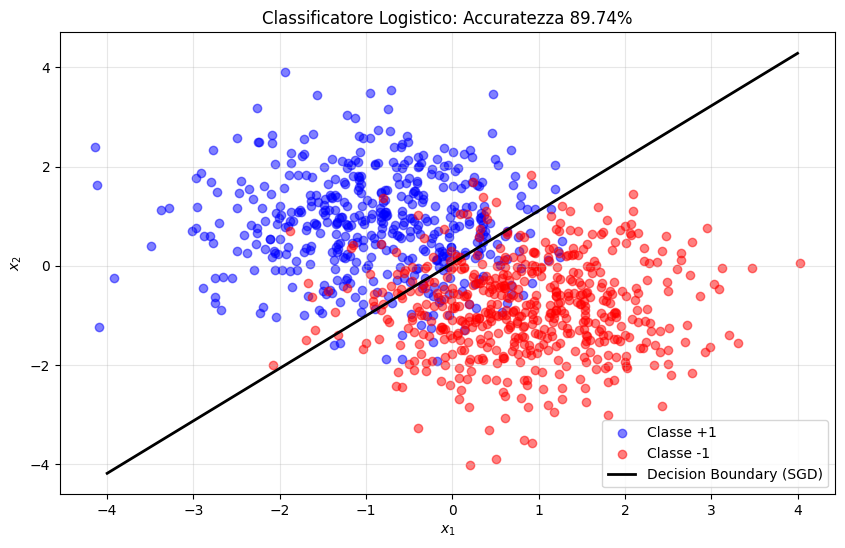

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Definiamo i punti per disegnare la retta (da x = -4 a x = 4)
x_plot = np.linspace(-4, 4, 100)

# 2. Calcoliamo la retta di decisione: beta1*x1 + beta2*x2 + bias = 0
# Esplicitando x2: x2 = -(beta1/beta2)*x1 - (bias/beta2)
beta1, beta2, bias = beta_final_SGD
y_plot = -(beta1/beta2) * x_plot - (bias/beta2)

plt.figure(figsize=(10, 6))

# 3. Disegniamo i punti del Test Set (usando y_test o y_true_test)
plt.scatter(x_test[y_true_test == 1, 0], x_test[y_true_test == 1, 1], c='blue', alpha=0.5, label='Classe +1')
plt.scatter(x_test[y_true_test == -1, 0], x_test[y_true_test == -1, 1], c='red', alpha=0.5, label='Classe -1')

# 4. Disegniamo la retta di separazione stimata dall'SGD
plt.plot(x_plot, y_plot, color='black', linewidth=2, label='Decision Boundary (SGD)')

plt.title(f"Classificatore Logistico: Accuratezza {accuracy:.2%}")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()